<a href="https://colab.research.google.com/github/TonyHamilton10/Analytics/blob/main/AdvancedAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Online Data Analysis


- Packages Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
url = 'https://data.cdc.gov/api/views/cf5u-bm9w/rows.csv?accessType=DOWNLOAD'
data  = pd.read_csv(url)
data.head()

,State,Season,_YearMonth,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type
0,Utah,2021-22,202206.0,All,All,All,36.0,Crude Rate
1,Utah,2021-22,202202.0,All,All,All,40.4,Crude Rate
2,Utah,2021-22,202203.0,All,All,All,12.1,Crude Rate
3,Utah,2021-22,202112.0,All,All,All,38.9,Crude Rate
4,Utah,2021-22,202207.0,All,All,All,34.5,Crude Rate


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41792 entries, 0 to 41791
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               41792 non-null  object 
 1   Season              41792 non-null  object 
 2   _YearMonth          41792 non-null  float64
 3   AgeCategory_Legend  41792 non-null  object 
 4   Sex_Label           41792 non-null  object 
 5   Race_Label          41792 non-null  object 
 6   MonthlyRate         40887 non-null  float64
 7   Type                41792 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.6+ MB


In [5]:
data.describe()

,_YearMonth,MonthlyRate
count,41792.000000,40887.000000
mean,202237.005671,31.776080
std,156.674013,62.157975
min,202003.000000,0.000000
25%,202106.000000,3.000000
50%,202210.000000,11.300000
75%,202402.000000,33.000000
max,202507.000000,1260.000000


In [6]:
data['YearMonth'] = data['_YearMonth'].astype(int).astype(str).str.slice(0,4) + '-' + data['_YearMonth'].astype(int).astype(str).str.slice(4,6)
data.head()

,State,Season,_YearMonth,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type,YearMonth
0,Utah,2021-22,202206.0,All,All,All,36.0,Crude Rate,2022-06
1,Utah,2021-22,202202.0,All,All,All,40.4,Crude Rate,2022-02
2,Utah,2021-22,202203.0,All,All,All,12.1,Crude Rate,2022-03
3,Utah,2021-22,202112.0,All,All,All,38.9,Crude Rate,2021-12
4,Utah,2021-22,202207.0,All,All,All,34.5,Crude Rate,2022-07


In [7]:
del data['_YearMonth']

In [15]:
states = data['State'].value_counts().iloc[1:].reset_index()

px.bar(states , x = 'State' , y = 'count' , template = 'gridon' , title = 'Number of States' ,
       text=[f'{x: ,}'.format(x) for x in states['count']]  )

- Number of States Most Affected By Covid

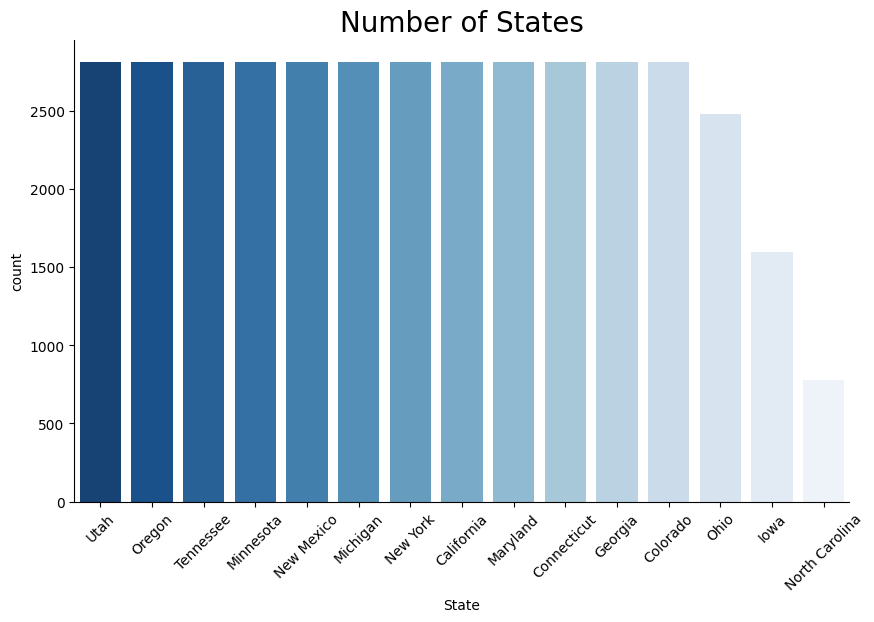

In [22]:
fig , ax = plt.subplots(figsize = (10 , 6))
sns.barplot(x = 'State' , y = 'count' , data = states , palette='Blues_r')
plt.xticks(rotation = 45)
plt.title('Number of States' ,fontsize =20)
sns.despine()
plt.show()

In [23]:
data.head()

,State,Season,AgeCategory_Legend,Sex_Label,Race_Label,MonthlyRate,Type,YearMonth
0,Utah,2021-22,All,All,All,36.0,Crude Rate,2022-06
1,Utah,2021-22,All,All,All,40.4,Crude Rate,2022-02
2,Utah,2021-22,All,All,All,12.1,Crude Rate,2022-03
3,Utah,2021-22,All,All,All,38.9,Crude Rate,2021-12
4,Utah,2021-22,All,All,All,34.5,Crude Rate,2022-07


In [26]:
ages   =  data['AgeCategory_Legend'].value_counts().reset_index()

px.bar(ages , x = 'AgeCategory_Legend' , y = 'count' , template = 'gridon' , title = 'Number of Infected Per Age Group' ,
       text=[f'{x: ,}'.format(x) for x in ages['count']]  )

<Axes: ylabel='Sex_Label'>

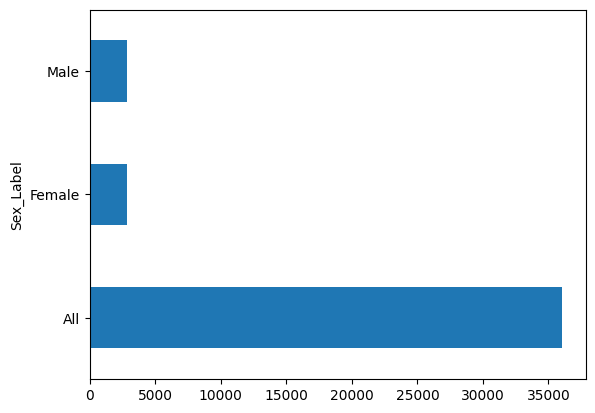

In [28]:
data['Sex_Label'].value_counts().plot(kind = 'barh')

In [29]:
sub_data = data[data['Sex_Label']!='All']

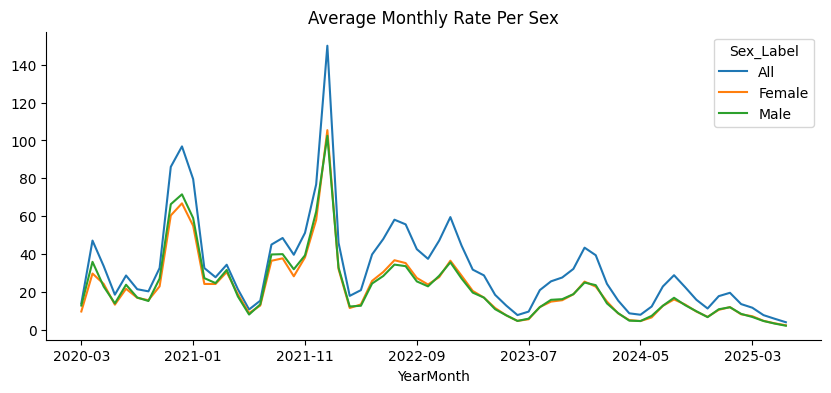

In [36]:
data.pivot_table(index='YearMonth' , columns='Sex_Label' , values='MonthlyRate' , aggfunc='mean').plot(kind = 'line' , figsize = (10 , 4))
plt.title('Average Monthly Rate Per Sex')
sns.despine()
plt.show()

In [39]:
grp = data['Race_Label'].value_counts().reset_index()

px.bar(grp , x = 'Race_Label' , y = 'count' , title ='Count by Race' , template='gridon' ,
       text = [f'{x: ,}'.format(x) for x in grp['count']])

In [40]:
data['Type'].value_counts()

,count
Type,
Crude Rate,41467
Age adjusted Rate,325


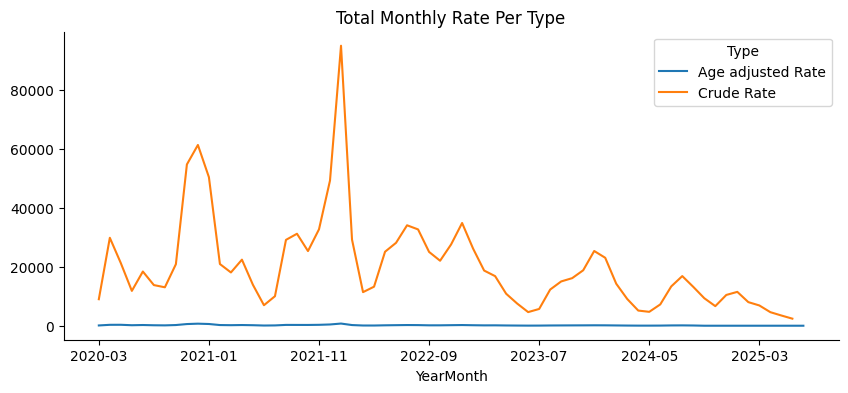

In [44]:
data.pivot_table(  index = 'YearMonth' ,values= 'MonthlyRate' , columns = 'Type'  , aggfunc='sum').plot(kind = 'line' , figsize = (10 , 4))
plt.title('Total Monthly Rate Per Type')
sns.despine()
plt.show()

# Read Html

In [51]:
url = 'https://data.transportation.gov/api/views/keg4-3bc2/rows.csv?accessType=DOWNLOAD'
new_data=  pd.read_csv(url)
new_data.head()


ValueError: No tables found